# INFO 5770 Data Analysis of Heart Failure Using the Medical Expenditure Panel Survey (MEPS) Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
print("All libraries imported successfully")

All libraries imported successfully


In [2]:
# Load the heart failure dataset
data = pd.read_csv("C:\\Users\\n\\Downloads\\archive (11)\\heart_failure_clinical_records_dataset.csv")


In [3]:
#Visualize the first five elements of the Dataset
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#Visualize the Last five values of the Datast
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


# Visualization and Exploratory Data Analysis(EDA)

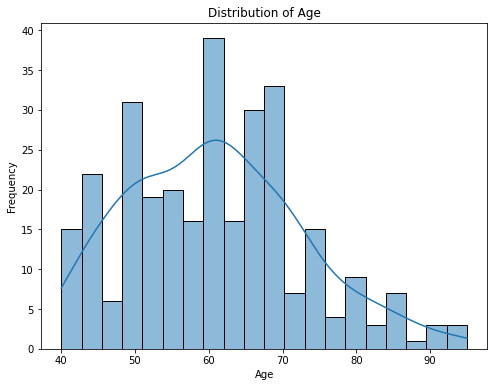

In [6]:
# Visualize the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


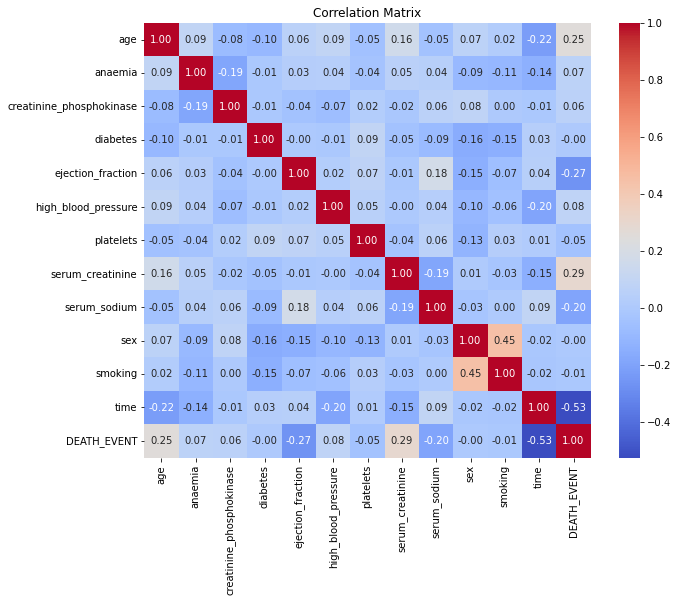

In [7]:
# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

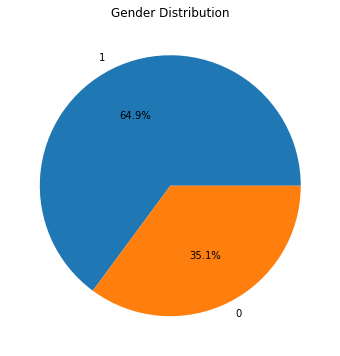

In [8]:

# Visualize the gender distribution
plt.figure(figsize=(6, 6))
data['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


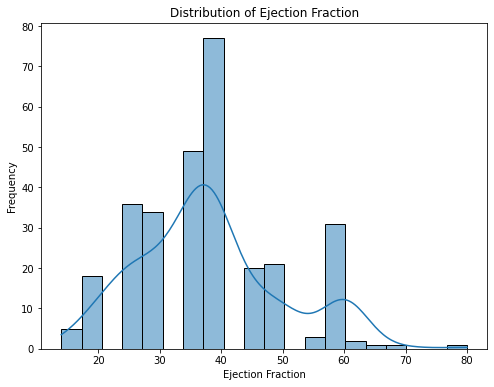

In [9]:

# Visualize the distribution of ejection fraction
plt.figure(figsize=(8, 6))
sns.histplot(data['ejection_fraction'], bins=20, kde=True)
plt.title('Distribution of Ejection Fraction')
plt.xlabel('Ejection Fraction')
plt.ylabel('Frequency')
plt.show()


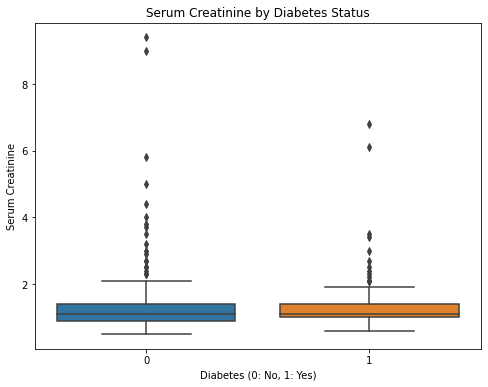

In [10]:
# Box plot of serum creatinine by diabetes status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='serum_creatinine', data=data)
plt.title('Serum Creatinine by Diabetes Status')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Serum Creatinine')
plt.show()


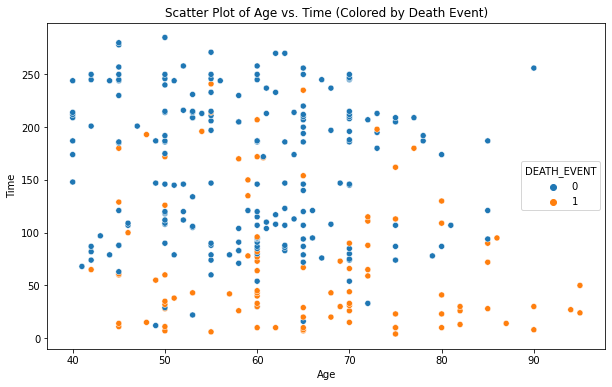

In [11]:

# Scatter plot of age vs. time colored by death event
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='time', hue='DEATH_EVENT', data=data)
plt.title('Scatter Plot of Age vs. Time (Colored by Death Event)')
plt.xlabel('Age')
plt.ylabel('Time')
plt.show()

In [12]:
# a) Predict Yearly Medical Expenditure
# For simplicity, we will use linear regression to predict yearly medical expenditure.
# You can choose more advanced models based on your dataset and objectives.

# Select relevant features and the target variable
X = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
          'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
          'sex', 'smoking', 'time']]
y = data['DEATH_EVENT']  # Assuming DEATH_EVENT represents medical expenditure (for simplicity)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)

[ 1.59454523e-01 -1.49419842e-01  2.59983035e-01  1.57811735e+00
  2.70246289e-01  9.01651901e-03  5.30230158e-01  2.77645477e-01
  8.35598096e-01  2.22785487e-01  2.82316049e-01  1.52483699e-01
  2.34064096e-01  3.34458071e-01  3.59298374e-01  5.40445515e-01
  1.07205565e-01  4.01799787e-01  2.80316830e-01  4.30287151e-01
  4.39945400e-01  3.83370106e-01  2.89736899e-01  5.42823862e-01
  5.23282053e-01 -1.51688172e-01  2.27678646e-02  1.67335855e-01
  2.30512266e-01 -8.87676415e-02  6.90189280e-01 -7.92389432e-02
  6.11949125e-01  8.77843204e-01  5.66970115e-01  4.07240062e-01
  2.79978783e-01  2.13119122e-01  3.62729948e-01  1.39419107e-01
  4.85441792e-01  7.70522494e-01  2.02154916e-01  2.63297211e-01
  4.97917385e-01  2.24099424e-01  3.38293828e-01  5.04509745e-02
  7.95987323e-02 -1.74704394e-02  5.05845954e-01  1.46231244e-03
  5.24332354e-01 -1.19757377e-01  1.58300829e-02  3.83060666e-01
  9.70428714e-02  7.40072527e-01  1.49064309e-01  7.11867759e-01]


In [13]:
# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.17868807219100244
R-squared: 0.2648262172713042


In [14]:
# b) Compare Healthcare Costs
# We will use visualization to compare healthcare costs among various social determinant factors.

# Create a DataFrame with relevant features and DEATH_EVENT (medical expenditure)
cost_data = data[['sex', 'age', 'ejection_fraction', 'time', 'DEATH_EVENT']]
print(cost_data)

     sex   age  ejection_fraction  time  DEATH_EVENT
0      1  75.0                 20     4            1
1      1  55.0                 38     6            1
2      1  65.0                 20     7            1
3      1  50.0                 20     7            1
4      0  65.0                 20     8            1
..   ...   ...                ...   ...          ...
294    1  62.0                 38   270            0
295    0  55.0                 38   271            0
296    0  45.0                 60   278            0
297    1  45.0                 38   280            0
298    1  50.0                 45   285            0

[299 rows x 5 columns]


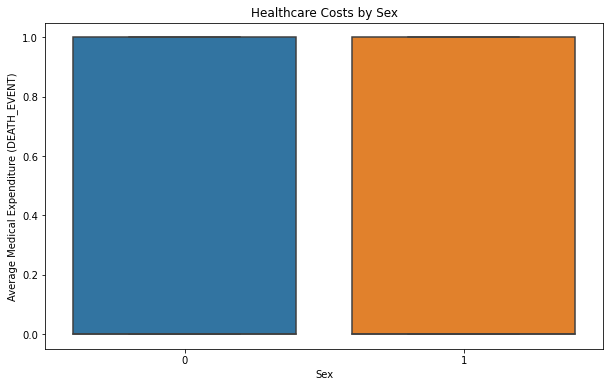

In [16]:
# Group data by social determinant factors and calculate average medical expenditure
cost_summary = cost_data.groupby(['sex', 'age', 'ejection_fraction', 'time']).mean().reset_index()

# Visualize healthcare costs by sex
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='DEATH_EVENT', data=cost_summary)
plt.title('Healthcare Costs by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Medical Expenditure (DEATH_EVENT)')
plt.show()

# Additional analyses can be performed to further explore disparities and relationships.


In [ ]:
#THE END